In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = data.drop('price', axis=1)
y = data['price']

In [7]:
x = pd.get_dummies(x, drop_first=True)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
y_pred = linear.predict(x_test)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 970043.4039201637


In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 1754318687330.6646


In [15]:
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.6529242642153182


In [16]:
import matplotlib.pyplot as plt

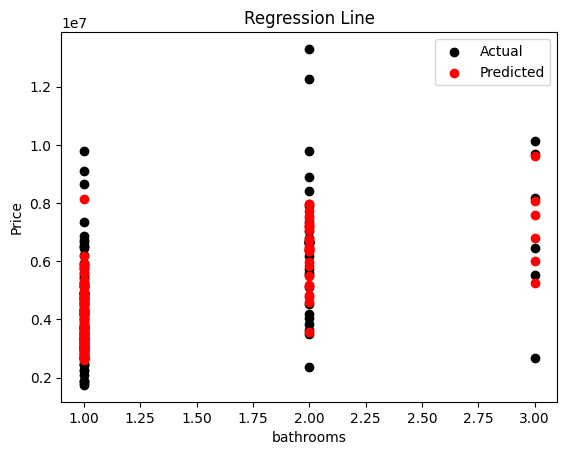

In [19]:
coef_data = pd.DataFrame({'Feature': x.columns, 'Coefficient': linear.coef_})
top_feature = coef_data.loc[coef_data['Coefficient'].abs().idxmax(), 'Feature']

plt.scatter(x_test[top_feature], y_test, color='black', label='Actual')
plt.scatter(x_test[top_feature], y_pred, color='red', label='Predicted')
plt.xlabel(top_feature)
plt.ylabel('Price')
plt.title('Regression Line')
plt.legend()
plt.show()

In [20]:
print(coef_data.sort_values(by='Coefficient', ascending=False))

                            Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
